In [91]:
import pandas as pd
import numpy as np

import geopandas as gpd ## trabajar con df en formatos espaciales (shp,xls,geojson, etc)

## importamos la funciones para la limpieza de la tabla del REDATAM
from Limpieza_res_redatam import conversion_redatam_matriz

In [92]:
ruta_l=r"C:\Users\Guillermo\Desktop\Python\05. Lib gestión pública"
## Abrimos el shp de límites departamentales 2017.
dep17=gpd.read_file(ruta_l+"\\Bases originales\Límites nacionales\\wlimites_depa.shp")
dep17=dep17[["iddpto","geometry"]].copy()
dep17=dep17.set_index("iddpto")

### df scrapeada por Diego usando el lenguaje Redatam y el portal de redatam
column2=["ubigeo","vars","fre","por","acum","otro"]
df3=pd.read_excel(ruta_l+"\\Bases originales\\tablas_redatam.xlsx", names=column2) ## tiene DNI
df3

,ubigeo,vars,fre,por,acum,otro
0,AREA # 01,AREA # 01,Departamento: Amazonas,,,
1,AREA # 01,,,,,
2,AREA # 01,V: Área concepto censal,Casos,%,Acumulado %,
3,AREA # 01,Urbano censal,66 273,"47,57%","47,57%",
4,AREA # 01,Rural censal,73 055,"52,43%","100,00%",
...,...,...,...,...,...,...
175,AREA # 25,,,,,
176,AREA # 25,V: Área concepto censal,Casos,%,Acumulado %,
177,AREA # 25,Urbano censal,7 808 049,"77,05%","77,05%",
178,AREA # 25,Rural censal,2 325 801,"22,95%","100,00%",


#### Revisamos la documentación de la función

In [89]:
conversion_redatam_matriz?

Signature: conversion_redatam_matriz(df)
Docstring:
conversion_redatam_matriz(df: 'DataFrame') -> Dataframe

#Docstring:
Permite de organizar los datos descargados de la plataforma de REDATAM - (INEI) en una formato de base datos de dos dimensiones.
La base de datos de ingreso corresponde a un archivo en formato Excel, el cual se descarga luego de la busqueda de variables en REDATAM
La base de datos resultante es un DataFrame con el ubigeo como índice
File:      c:\users\guillermo\desktop\python\05. lib gestión pública\limpieza_res_redatam.py
Type:      function


In [112]:
## utilizamos la función la tabla scrapeada por Diego
df4=conversion_redatam_matriz(df3)
df4.head()

vars,Rural censal,Urbano censal,Total
ubigeo,,,
01,73 055,66 273,139 328
02,140 691,272 759,413 450
03,91 983,90 023,182 006
04,50 309,517 813,568 122
05,115 629,162 811,278 440


In [114]:
## limpiamos los tipos de la variables resultante
df4["Rural censal"]=df4["Rural censal"].replace(" ", "", regex=True)
df4["Urbano censal"]=df4["Urbano censal"].replace(" ", "", regex=True)
df4["Total"]=df4["Total"].replace(" ", "", regex=True)

df4["Rural censal"]=df4["Rural censal"].astype(int)
df4["Urbano censal"]=df4["Urbano censal"].astype(int)

df4["Total"]=df4["Total"].astype(int)
### porcentaje de población urbana
df4["ur_p"]=(df4["Urbano censal"]/df4["Total"])*100
df4.head()

vars,Rural censal,Urbano censal,Total,ur_p
ubigeo,,,,
01,73055,66273,139328,47.566175
02,140691,272759,413450,65.971460
03,91983,90023,182006,49.461556
04,50309,517813,568122,91.144684
05,115629,162811,278440,58.472561


Porcentaje de población urbana 2017


<AxesSubplot:>

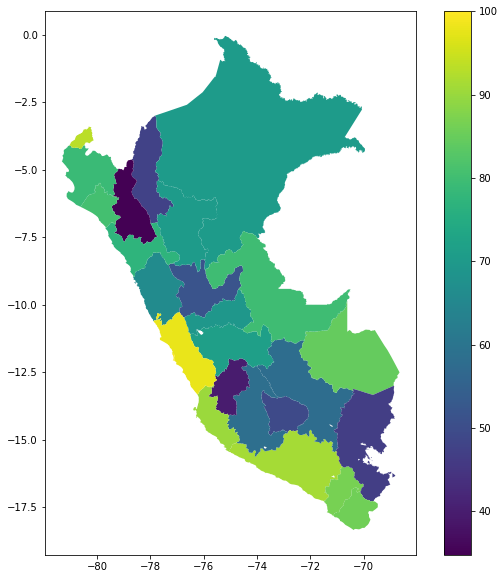

In [115]:
print("Porcentaje de población urbana 2017")
dep17.merge(df4, right_index=True, left_index=True, how='outer', validate='1:1', indicator="_merge").plot(column='ur_p', legend=True,figsize=(10,10))

#### Identificación etnica - Nivel: distrito

In [109]:
### abrimos dos ejemplos de resultados de Redatam
column=["info_g","vars","fre","por", "acum"]
df=pd.read_excel(ruta_l+"\\Bases originales\\identi_INEI.xlsx", names=column) ## identificación etnica
df2=pd.read_excel(ruta_l+"\\Bases originales\\identi_INEI_pro.xlsx", names=column) ## tiene DNI

In [110]:
df1=conversion_redatam_matriz(df)
df1.head()

vars,Aimara,Blanco,Mestizo,Nativo o indígena de la amazonía,"Negro, moreno, zambo, mulato / pueblo afroperuano o afrodescendiente",Nikkei,No sabe / No responde,Otro,Parte de otro pueblo indígena u originario,Quechua,Tusán,Total
ubigeo,,,,,,,,,,,,
010101,23,1498,19867,77,791,3,598,188,28,1606,1,24680
010102,0,3,119,0,0,0,11,0,0,76,0,209
010103,0,16,745,0,4,0,14,4,0,3,0,786
010104,0,2,493,0,4,0,10,0,0,14,0,523
010105,0,5,440,0,9,0,3,1,0,1,0,459


In [332]:
%%timeit
conversion_redatam_matriz(df)

518 ms ± 18.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Cuenta con DNI - Nivel: Provincia

In [336]:
df_p=conversion_redatam_matriz(df2)
df_p.head()

vars,No recuerda,No tiene documento alguno,Solo tiene carné de extranjería,Solo tiene partida de nacimiento,Tiene DNI,Total
ubigeo,,,,,,
0101,4431,127,54,202,50692,55506
0102,6170,1372,40,1231,65287,74100
0103,2120,78,27,116,23296,25637
0104,4868,1863,16,1517,34206,42470
0105,3687,277,17,290,40165,44436
